# Bayesian and Frequentist Estimation and Inference

This notebook explores Bayesian methods from a foundational perspective, contrasting the assumptions required for Bayesian inferences with the assumptions required for frequentist inferences, and the differences in interpretation of uncertainties for the two paradigms.

It also discusses using frequentist measures of uncertainty for Bayesian estimates.

It is adapted from Stark (2015) and Stark and Tenorio (2010), with additional material on election audits.

## What is a Bayesian?

Per I.J. Good, a Bayesian is someone for whom it makes sense to talk about the conditional probability that a hypothesis $H$ is true, given evidence $E$.

For a frequentist, such a question generally does not make sense: $H$ is either true or not. Its truth is not random, just unknown.

### Bayesian estimates

+ General approach (viz, don't even need data to make an estimate)

+ Guaranteed to have some good frequentist properties (if the prior is proper and the model is finite-dimensional)

+ Can be thought of as a kind of "regularization"

+ Elegant math from perspective of decision theory: convexify strategy space

### Uncertainties

+ Bayesian and frequentist uncertainties have completely different interpretations

    - Frequentist: hold parameter constant, characterize behavior under repeated measurement
    - Bayesian: hold measurement constant, characterize behavior under repeated selection of the parameter from the prior

+ Credible regions versus confidence regions

    - credible level: probability that by drawing from prior, nature generates an element of the set, given the data
    - confidence level: probability that procedure gives a set that contains the truth

+ Can grade Bayesian methods using frequentist criteria
    - E.g., what is the coverage probability of a credible region?

### Toy problem: bounded normal mean

+ Observe $Y \sim N(\theta, 1)$.

+ Know _a priori_ that $\theta \in [-\tau, \tau]$

+ Bayes "uninformative" prior: $\theta \sim U[-\tau, \tau]$

<img src="../Figs/starkTenorio09-length.png" style="height: 650px;" />

<img src="../Figs/starkTenorio09-coverage.png" style="height: 650px;" />

### Duality between Bayes and minimax approaches

+ Formal Bayesian uncertainty can be made as small as desired by choosing prior appropriately.

+ Under suitable conditions, the minimax frequentist risk is equal to the Bayes risk for the "least-favorable" prior.

+ If Bayes risk is less than minimax risk, prior artificially reduced the (apparent) uncertainty. Regardless, means something different.

+ Least-favorable prior can be approximated numerically even for "black-box" numerical models, a la Schafer & Stark (2009)

+ Posterior uncertainty measures meaningful only if you believe prior

+ Changes the subject

+ Is the truth unknown? Is it a realization of a known probability distribution?

+ Where does prior come from?

    - Usually chosen for computational convenience or habit, not "physics"
    
    - Priors get their own literature
    
    - Eliciting priors deeply problemmatic
    
    - Why should I care about your posterior, if I don't share your prior?

+ How much does prior matter?

+ Slogan "the data swamp the prior." Theorem has conditions that aren't always met.

#### Uncertainty

+ Not all uncertainty can be represented by a probability

+ "Aleatory" randomness

    - Canonical examples: coin toss, die roll, lotto, roulette
    - under some circumstances, behave "as if" random (but not perfectly)

+ Epistemic: stuff we don't know

<img alt="LeCam 1977" src="../Figs/leCam77Probs.png" width="80%" />

+ Bayesian way to combine aleatory variability epistemic uncertainty puts beliefs on a par with an unbiased physical measurement w/ known uncertainty.
    
+ Claims by introspection, can estimate without bias, with known accuracy,
as if one's brain were unbiased instrument with known accuracy

+ Bacon put this to rest philosophically. Moreover, empirically:
    - people are bad at making even rough quantitative estimates
    - quantitative estimates are usually biased
    - bias can be manipulated by anchoring, priming, etc.
    - people are bad at judging weights _in their hands_:  biased by shape & density
    - people are bad at judging when something is random
    - people are overconfident in their estimates and predictions
    - confidence  unconnected to actual accuracy.
    - anchoring affects entire disciplines (e.g., Millikan, c, Fe in spinach)

+ what if I don't trust your internal scale, or your assessment of its accuracy?

+ same observations that are factored in as "data" are also used to form beliefs: the "measurements" made by introspection are not independent of the data

+ if you try several priors, you are not using Bayesian statistics

### Bayesian and Frequentist Uncertainties

+ What varies?

+ What is constant (conditioned on)?

+ How do we know how the variable thing varies?

+ Are we talking about our world, or a set of possible worlds?

## Statistical Framework

We want to use the measurement $Y$ to learn about $\theta$, an unknown parameter.

The datum $Y$ is an $n$-vector of real numbers, i.e., elements
of $\Re^n$.
Mathematics, physics, or previous experiments tell us the possible values
of $\theta$, which are represented by the set $\Theta$.
The set $\Theta$ can be high-dimensional, even infinite-dimensional.

The datum $Y$ is related to $\theta$ through a _measurement model_
that gives the probability distribution $\Pr_\eta$ of $Y$ for each 
$\eta \in \Theta$.
It connects the parameter to the probability distribution of the data.

If $\theta = \eta$, then $Y \sim \Pr_\eta$.

For any particular set $A \subset \Re^n$, $\Pr_\eta \{ Y \in A \}$ generally will
not be equal to $\Pr_{\eta'} \{ Y \in A \}$ if $\eta \ne \eta'$.
If there are parameters $\eta \ne \eta'$ such that
$\Pr_\eta \{ Y \in A \} = \Pr_{\eta'} \{ Y \in A \}$ for all (measurable) subsets $A \subset \Re^n$, then $\theta$ is not _identifiable_.

**Technical note.** We assume that there is a known measure $\mu$ that dominates
the set of distributions $\mathcal{P} \equiv \{ \Pr_\eta : \eta \in \Theta\}$, so
we can use "densities" even if some members of $\mathcal{P}$ have atoms.
This assumption makes it easier to define likelihoods, which are required
for the Bayesian framework; it also implies that all the measures $\mathcal{P}$
are defined on a common sigma-algebra $\cal A$ of subsets of $\Re^n$,
which avoids some potential pathologies.
If this language isn't familiar, just assume for now that no matter what $\eta \in \Theta$
might be, $Y$ has an ordinary probability density (or assume that $Y$ has a 
discrete distribution).

With respect to $\mu$, the density of $\Pr_\eta$ at $y$ is
\begin{equation*}
p_\eta(y) \equiv \left . \frac{d\Pr_\eta}{d\mu} \right |_y.
\end{equation*}

For any fixed $y$, the _likelihood of $\eta$ given $Y = y$_ is
$p_\eta(y)$, viewed as a function of $\eta$ with $y$ held constant.

It is often impossible to estimate $\theta$
with any useful level of accuracy; in many problems, $\theta$ is not even identifiable.

But it still may be possible and scientifically interesting to estimate a
_parameter_ $\lambda = \lambda[\theta]$, a property of $\theta$.
The parameter might be the average of $\theta$ over some volume of space or time,
a norm or semi norm of $\theta$, or the number of local maxima $\theta$ has,
for instance.
We shall assume that the possible values of $\lambda[\theta]$ are also elements of
a Hilbert space.

### Bayesian election audits

A Bayesian election audit (Rivest and Shen, 2012) uses Bayes rule applied to a prior probability distribiution on voter preferences, together with audit data, to find the posterior probability that the reported outcome is incorrect.
The audit stops only if that posterior probability is smaller than a specified limit.

Rivest and Shen (2012) frame it as:

> What is the probability that each candidate
would be determined to be the actual winner, if
the auditing process continued to examine all
the ballots, and the remaining ballots audited
showed results similar to what we’ve seen in
the ballots audited so far?

If the probability that anybody other than the reported winner actually won is small enough, the audit stops: the _upset probability_ is small.

### Dirichlet priors

A Bayesian auditor requires a prior probability distribution for voter preferences--for the votes that each ballot shows.

A typical form assumes that the prior probability that a ballot is of type $k$, $1 \le k \le K \ge 2$ has a _Dirichlet distribution_:

Fix $ a = (a_j)_{j=1}^k$ with $a_j > 0$.
Let $S_K$ denote the _unit simplex_ in $K$-dimensional space, that is,

\begin{equation*}
   S_K \equiv \{ (x_k)_{k=1}^K \in \Re^K : x_k \in (0, 1) \mbox{ and } \sum_k x_k = 1.
\end{equation*}

Then for $x \in S_k$, the joint density is 

\begin{equation*}
   f_a(x) \equiv \frac{1}{B(a)} \prod_{k=1}^K x_k^{a_k-1},
\end{equation*}

where 

\begin{equation*}
   B(a) \equiv \frac{\prod_k \Gamma(a_k)}{\Gamma \left ( \sum_k a_k \right )}.
\end{equation*}

The Dirichlet distribution is _conjugate_ to the multinomial distribution, in the sense that if $X \sim \mbox{Multinomial}(\eta)$ and $\eta \sim \mbox{Dirichlet}(a)$ then the posterior distribution of $\eta$ given $X=x = (x_1, \ldots, x_K)$ is $\mbox{Dirichlet}(a+x)$.

In [1]:
%matplotlib inline
from __future__ import division, print_function
import matplotlib.pyplot as plt
import matplotlib.tri as tri

import math
import numpy as np
import scipy as sp
import scipy.stats
from scipy.stats import dirichlet
import pandas as pd
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML

/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
## This code is adapted from 
# http://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/
# and updated for compatibility with Python 3

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 \
             for i in range(3)]

def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric coordinates.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     np.prod(np.array([gamma(a) for a in self._alpha]))
    def pdf(self, x):
        '''Returns Dirichlet pdf at `x`.'''
        from operator import mul
        return self._coef * np.prod(np.array([xx ** (aa - 1)
                                         for (xx, aa)in zip(x, self._alpha)]))

def draw_pdf_contours(dist, nlevels=300, subdiv=8, **kwargs):
    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

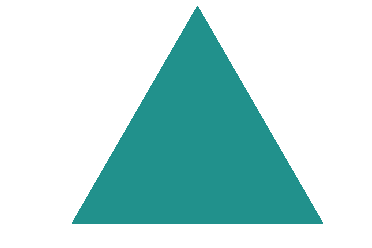

<function __main__.f(a1=1, a2=1, a3=1)>

In [3]:
def f(a1=1, a2=1, a3=1):
    draw_pdf_contours(Dirichlet([a1, a2, a3]))
    plt.show()

interact(f, a1=(1,50,1), a2=(1,50,1), a3=(1,50,1))


Conceptually, Bayes election audits work as follows:

1. Model voter preferences as random.
1. Invent a joint prior probability distribution for voter preferences in that model.
1. Simulate infinitely many elections from that prior model for voter preferences.
1. Audit each of those elections; discard those for which the audit data does not match the actual audit data.

+ A Bayes audit then answers the question, "among the elections that remain after step 4, what fraction have actual winners that match the reported winners for this election?"

+ That question is about an infinite hypothetical ensemble of elections generated from an invented model. It is not about the current election. (It does use the current audit data.)

+ For the posterior probability to mean anything about the current election, you also have to assume that the current election is like an election selected at random from those left in the hypothetical population after step 4.  
    - In that case, you are asserting that step 1 makes sense for real elections and that at step 2, you accurately included all features of the distribution of voter preferences that might affect your conclusion.
    - For instance, if there's dependence among preferences within families, or if there's a piece of "fake news" that affects people's preferences just before election day, those are included to the extent that they could change the posterior probability meaningfully.

### Concerns about Bayes audits

+ A Bayes audit does not necessarily provide strong evidence that _this_ election found the right winners.

+ Instead, it assesses whether a large fraction of synthetic elections in some hypothetical population based on some postulated (and simple) model, conditioned on the audit data, have the same winners as those reported in the current election.

+ There's no closed form calculation for the risk: finding the posterior generally involves simulations, and somewhat complex software. That makes audits less than transparent. 

+ Bayesian audits don't necessarily provide a quantifiable limit on the risk, and they depend on a prior probability distribution that the user can choose--it's an ad hoc choice. 

+ Different priors lead to different posterior probabilities of the outcome being incorrect. 

+ It might be the case that if the prior is chosen to be "least favorable," the resulting Bayes risk would be equal to the frequentist risk limit in an RLA. This would require some mathematical theory to demonstrate, and would require even more complex software to implement.

## Bayesian Estimation and Inference

The Bayesian approach starts with a _prior probability distribution_ $\pi$ on $\Theta$,
and the likelihood function $p_\eta(y)$.

To have a prior probability distribution involves some technical restrictions
that will not be considered here.
(For instance, $\Theta$ must be a measurable subset of a measurable space, and
the likelihood function must be jointly measurable with respect to $\eta$ and $y$.)

A prior $\pi$ is _proper_ if it has total mass 1, that is, if $\pi(\Theta) = 1$.
(Some people use _improper priors_, for instance, the uniform distribution on
the real numbers $\Re$, which assignes infinite probability to $\Theta = \Re$.)

Together, $\pi$ and $p_\eta$ imply a joint distribution of $\theta$ and $Y$.
The _marginal distribution_ or _predictive distribution_ of $Y$ is
\begin{equation*}
	   m(y) = \int_\Theta p_\eta(y) \, \pi(d\eta).
\end{equation*}

If we observe that $Y=y$, we use that information in
Bayes' rule to find the _posterior distribution of $\theta$ given $Y=y$_:
\begin{equation*}
\pi (d\eta | Y = y)  = \frac{p_\eta(y) \; \pi(d\eta) }{m(y)} .
\end{equation*}

The marginal density $m(y)$ can be zero, but the probability that happens is zero.

In principle, the posterior distribution is a complete solution to the inference problem:
All the information from the prior and the data is combined in the posterior
distribution.
The posterior distribution $\pi_\lambda(d \ell | Y = y)$
of $\lambda[\theta]$ is the distribution induced by the posterior distribution
of $\theta$:
For any (measurable) set $A$ of possible values of $\lambda$,

\begin{equation*}
\Pr(\lambda[\theta] \in A | Y = y) = \int_{\ell \in A} \pi_\lambda(d \ell | Y = y)
\equiv \int_{\eta: \lambda[\eta] \in A} \pi(d \eta | Y = y).
\end{equation*}

If we get additional data, we apply Bayes' rule again: the current posterior
becomes the new prior.

### Arguments for the Bayesian approach

One argument for the Bayesian approach is that people _are_ Bayesian: the approach is _descriptive_.
There is considerable evidence that this is false.
I do not know of anyone who uses Bayes' theorem to combine and
update prior beliefs in ordinary life.
Extensive empirical research, starting with the seminal work
of Tversky and Kahneman (1974), shows that even people with training in
probability fail to incorporate Bayes rule in their day-to-day reasoning.

Another argument is that people _should be_ Bayesian: the approach is
_normative_.
According to the argument, if people are not Bayesians,
their probability assignments are "incoherent" and others can make "Dutch book" against
them.
("Dutch book" is a combination of bets such that no matter what the outcome, the bettor
loses money.)
The coherence argument depends in part on the assumption that all beliefs
can be expressed as probability distributions--which I thinks is false.
The "Dutch book" argument depends on the non-Bayesian analyst's willingness to
cover an unlimited number of bets, and on the assumption that the Bayesian analyst's
prior is _proper_, that is, that the total mass of the prior is 1.
In practice, improper priors are common; for instance, it is common to use a uniform
prior for parameters on unbounded domains.

A third argument is that the choice of the prior does not matter much, because the data
eventually "overwhelm" the prior: given enough
data, you end up with essentially the same posterior distribution for "every" prior.
This convergence occurs in some circumstances and not in
others: theorems have conditions.

Bayesian methods
generally make the uncertainty appear smaller than a frequentist analysis would show,
which makes the results more optimistic, and in part because
they give a (numerically computable) recipe that can be applied to essentially 
any problem--if you have a prior, a fast enough computer, and a good algorithm.
(The development of Markov Chain Monte Carlo, MCMC, made it possible to
compute posterior distributions in a far larger class of problems, greatly
increasing the appeal of Bayesian methods.)
Of course, the fact that you can compute something does not automatically make
the answer meaningful, relevant, or useful.

+ A Bayesian can tell you the probability of an act of nuclear terrorism in the year 2025; a frequentist cannot make sense of what "probability" could mean in that context.

+ A Bayesian can tell you the probability that there are civilizations of intelligent beings in other galaxies; a frequentist cannot make sense of the question.

+ A Bayesian can tell you the probability that a particular coin in your pocket is fair, sight unseen; a frequentist cannot make sense of the question.

+ A Bayesian can tell you the probability that a particular hypothesis is true; a frequentist thinks hypotheses are either true or false.

When both frequentist and Bayesian methods can be applied,
probability and uncertainty mean quite different things to frequentists and to 
Bayesians, as elaborated below.

### Priors

In the Bayesian approach, all information about $\theta$ is expressed as
a probability distribution, and all probabilities quantify degree of belief.
(In the frequentist framework, probability is defined in terms of long-run relative frequency.)

+ If the analyst is certain that $A$ is true, $A$ has probability 1.

+ If she is certain that $A$ is false, $A$ has probability 0.

+ If she believes that $A$ is true (or that $A$ will occur) with the same strength that she believes that $A$ is false (or that $A$ will not occur), $A$ has probability $1/2$.

+ If she believes twice as strongly that $A$ is true as she believes $A$ is false, $A$ has probability $2/3$.

More generally, if $A$ and $B$ are two statements
and the analyst believes $r$ times as strongly
that $A$ is true than she believes that $B$ is true, then the probability of $A$ is
$r$ times the probability of $B$. 

To use the Bayesian framework to quantify uncertainty, 
one _must_ quantify beliefs and
constraints by means of probability distributions.
(As discussed below, there can be good reasons to use Bayesian estimators 
without necessarily using the Bayesian framework to quantify uncertainty.)
The prior probability distribution 
quantifies the analyst's beliefs about $\theta$ before data are collected:
The constraint $\theta \in \Theta$ means the prior probability
distribution $\pi$ must assign probability $1$ to $\Theta$.

Even in the simplest non-degenerate case, there are infinitely many probability distributions
that assign probability 1 to $\Theta$.
In principle, it is up to the analyst to introspect to find the unique prior that reflects
her beliefs about $\theta$; in turn those beliefs should be constructed from previous
experience and previous beliefs through the repeated application of Bayes' theorem.

I have never seen a Bayesian analysis of real data in which
the data analyst made a serious attempt to quantify her beliefs using a prior.
(Nor, to my knowledge, have I met anyone who uses Bayes' theorem in real life to 
update her beliefs.)
Instead, in my experience, priors are generally taken as given, and
appear to be selected or justified in five ways: 

1. to make the calculations simple (e.g., closed form, using a "conjugate" prior)
1. because the particular prior is conventional
1. so that the prior satisfies some invariance principle
1. with the assertion that the prior is "uninformative,"
1. because the prior roughly matches the relative frequencies of values in some population.

Some researchers use _Laplace's Principle of Insufficient Reason_
to select an "uninformative" prior:
If there is no reason to  believe that outcomes are not equally likely, assume that
they are equally likely.
Of course, the outcomes considered may depend on the parametrization,
among other things.
Generally, however, the principle generally leads to a prior $\pi$ that is uniform
on $\Theta$.
That is, the probability of any subset of $\Theta$ is assumed to be proportional to its
Lebesgue measure.

For instance, the "uninformative" prior for a real parameter known
to be in $\Theta \equiv [-1, 1]$
is the uniform distribution on $[-1, 1]$,
which has density $f(\eta) = \{ 1/2, \eta \in [-1, 1]; \;\; 0, \mbox{ otherwise}\}$.

This prior captures the constraint $\theta \in [-1, 1]$, but it does far more than that:
It assigns probabilities to all measurable subsets of $[-1, 1]$.
For instance, it says that there is a 50% chance that $\theta$ is positive,
a 50% chance that the absolute value of $\theta$ is greater than $1/2$,
and a 90% chance that the absolute value of $\theta$ is greater than $1/10$.
This is not information that came from the constraint: It is information added by the
prior.
The constraint $\theta \in \Theta$ requires $\pi$ to assign probability $1$ to $\Theta$,
but it does not restrict the probabilities $\pi$ assigns to subsets of $\Theta$.
Any choice of $\pi$, "uninformative" or not, says more about $\theta$ than the original
constraint did.

This problem---that turning constraints into priors adds information--grows worse as the
dimension of the parameter $\theta$ grows.
For instance, suppose the unknown $\theta$ is a vector in $n$-dimensional Euclidean space
$\Re^n$, and we know that $\| \theta \| \le 1$--that is, $\Theta$ is the unit
ball in $\Re^n$.

The volume of a spherical shell from radius $1-\epsilon$ to $1$ is a larger and larger
fraction of the volume of the unit sphere as the dimension $n$ grows.
For any $\alpha \in (0, 1)$ and $\epsilon \in (0, 1)$, there is a dimension
$n$ so that the (uniform) probability of
$\{ \eta : \| \eta \| \in [1-\epsilon, 1]\}$,
the spherical shell from radius $1-\epsilon$ to $1$,
is at least $\alpha$.

What does this mean?
Starting with the constraint that $\| \theta \| \le 1$--and without collecting any data--we
end up with arbitrarily high certainty that in fact $\| \theta \| \ge 1-\epsilon$.
It is the prior that gives us this certainty, not the constraint.
The prior is not "uninformative" about the norm.

Conversely, suppose we put a rotationally invariant prior on the unit ball in such a 
way that the marginal
distribution of the norm is uniform.
Consider the ball of radius $1-\epsilon$.
It has probability $1-\epsilon$ regardless of the dimension of the space, even though
its volume is a negligible fraction of the volume of the unit ball if the dimension of the
space is large.
This prior is not "uninformative" with respect to volume:  It says that the model is extremely
likely to be in a subset of $\Theta$ that has very small volume.

The approach collapses in infinite-dimensional spaces.
For instance, suppose $\theta$ is an element of an infinite-dimensional separable Hilbert space,
and that the constraint set $\Theta$ is rotationally invariant
(an example would be $\Theta \equiv \{ \eta : \| \eta \| \le 1 \}$).
If the prior respects that rotational invariance, it is a theorem that
the prior either assigns probability 1 to the event that $\theta = 0$
or it assigns probability 1 to the event that the norm of $\theta$ is 
infinite--contradicting
the constraint!

### Interpretation of Bayesian priors and estimates
Prior probability distributions--and hence posterior distributions--are quantifications
of the analyst's degree of belief.
As such, they change the subject from the experiment and the external world 
to the analyst's state of mind.
Suppose I claim that my prior probability distribution for the load on a structure as a fraction of
its breaking strength is the uniform distribution on $[0, 1]$.
I am right if that accurately reflects what I believe.
I am wrong if it does not accurately reflect what I believe.
The relationship between the prior and the world has no bearing on whether I am right or wrong.
Experiments that could show I am wrong involve checking what I actually believe--for instance,
psychological testing or determining what bets I would take at what odds--rather than
measurements of the structure or similar structures.

Two analysts can have very different priors and both be right, because what makes
a prior right is that it correctly quantifies the analyst's belief.
If I do not share your prior beliefs in detail, then even if we agree on the likelihood function and the data,
we will have different posterior distributions for $\theta$.
Why should your posterior distribution matter to me?

If a Bayesian analysis results in the statement, "there is a 99.9% chance that the applied load
will be less than 10% the breaking strength,"
it means that the analyst is quite sure that the load will be low,
but it is not at all clear what it means about safety.

For a different prior, an equally correct analysis might find that
there is a 99.9% chance that the applied load will exceed 90% the breaking strength.
If so, a Bayesian analysis might appropriately be viewed with skepticism.

On the other hand, if one could show that no matter what prior is used, there is at least a 99.9% chance
that the applied load will be less than 10% of the breaking strength, the Bayesian position seems much
more persuasive.

The utility and persuasiveness of Bayesian analyses may hinge on the 
sensitivity of the conclusions to the choice of prior.

### The role of the posterior

One fundamental feature (indeed, an axiom) of Bayesian estimation and inference is that the posterior distribution of the model given the data contains **all** the information about the model, including information from the prior and from the data. 
No information other than the posterior is needed to completely describe our state of knowledge about the parameter.

The following example from LeCam (1977) shows that this is problematic.

Suppose we are interested in the probability $\theta$ that a particular coin lands heads. We start with a prior probability distribution for $\theta$.
Suppose we start with a Dirichlet prior, which, in this case, simplifies to a prior density

\begin{equation*}
   f(\theta) \propto \theta^{a_1} (1-\theta)^{a_2}.
\end{equation*}

Since the Dirichlet distribution is conjugate to the multinomial, and the binomial distribution is a special case of the multinomial, after tossing the coin $n$ times independently and updating the prior to find the posterior, the posterior will be of the form

\begin{equation*}
   f(\theta) \propto \theta^{a_1+k} (1-\theta)^{a_2+n-k},
\end{equation*}

where $k$ is the number of heads among the $n$ tosses.

A Bayesian now reports the posterior distribution. For instance, the posterior might turn out to be

\begin{equation*}
  f(\theta) \propto \theta^{100} (1-\theta)^{100}.
\end{equation*}

The problem is this: that posterior might be the result of a "flat" prior after 200 tosses, or just as easily be simply the prior after zero tosses.

To quote LeCam:

> If the neo-Bayesian has to give not only his final measure, but also his
initial measure, the description of the experiment and the result obtained
there, the simplicity of the Bayes approach is lost.

## The Frequentist approach

The main difference between Bayesian and frequentist approaches to constraints
is the difference between
believing that $\theta$ is drawn at random from $\Theta$ according to the 
known distribution $\pi$
and believing that $\theta$ is simply an unknown element of $\Theta$.
(The interpretation of probability also differs substantially between the two points of view.)

For Bayesians, probability quantifies degree of belief.

For frequentists, probability has to do with long-term regularities in repeated trials.
The probability of an event is defined to be the long-run limiting relative frequency with which
the event occurs in independent trials under 'essentially identical' conditions.
(If the conditions were exactly identical,
then--within classical physics, at least--the outcome would be identical.)

The canonical random experiment, tossing a fair coin, will give heads every time or tails every time
if the coin is tossed with initial conditions that are similar enough.
Defining "essentially identical" is a hard problem for the frequentist approach.
Another issue is the assumption that repeated trials result in relative frequencies that converge to
a limit.

The frequentist approach restricts the 
kinds of things one can make probability statements about:
Only trials that, in principle, can be repeated indefinitely lead to
probabilities.
For instance, a conventional frequentist approach cannot make sense of questions like
"what is the chance of an act of nuclear terrorism in the year 2025?" or
"what is the chance of an earthquake with magnitude 8.0 or above in the San Francisco Bay
Area in the next 20 years?," much less supply
numerical values for those chances.

In the frequentist approach, probability generally comes from the measurement process or the
experiment, not from the parameter or "state of the world."
There is statistical uncertainty because there is sampling variability or measurement error
or random assignment of subjects to treatments,
not because the underlying parameter is random.

There is no need to assume that $\theta$ is random to use the frequentist approach,
so there is no need to invent a prior distribution $\pi$

## Summarizing uncertainty
There are many ways to quantify uncertainty.
We shall consider two, each of which has a Bayesian and a frequentist variant:
mean squared error (a frequentist measure) and posterior mean squared error
(the related Bayesian measure); and confidence sets (a frequentist construct)
and credible regions (the related Bayesian construct).

### Mean Squared Error
Recall that we have assumed that $\lambda[\theta]$ takes values in a Hilbert space.

Suppose we choose to estimate $\lambda[\theta]$ by the estimator $\widehat{\lambda}(Y)$,
a (measurable) map from possible data values $y$ into possible values of $\lambda[\eta]$,
$\eta \in \Theta$.

The mean squared error (MSE) of $\widehat{\lambda}$ when $\theta = \eta$ is

\begin{equation*}
\mbox{MSE}(\widehat{\lambda}(Y), \eta) \equiv \mathbb{E}_\eta \| \widehat{\lambda}(Y) - \lambda[\eta] \|^2.
\end{equation*}

+ MSE depends on $\eta$.

+ The expectation is with respect to $\Pr_\eta$, the distribution of the data $Y$ on the assumption that $\theta = \eta$.

+ If we get to select the estimator $\widehat{\lambda}$, we might seek an estimator that makes $\mbox{MSE}(\widehat{\lambda}(Y), \theta)$ small.

+ Since the true value of $\theta$ is unknown, in general we cannot select the estimator $\widehat{\lambda}$ to make the actual MSE as small as possible.

+ Instead, we might choose $\widehat{\lambda}$ to make the largest MSE as $\eta$ ranges over $\Theta$ as small as possible: _minimax MSE estimator_.

Related Bayesian measure: posterior mean squared error (PMSE),

\begin{equation*}
\mbox{PMSE}(\widehat{\lambda}(y), \pi) \equiv \mathbb{E}_\pi \| \widehat{\lambda}(y) - \lambda[\eta] \|^2.
\end{equation*}

+ PMSE depends on $\pi$ and the observed value of $y$.

+ The expectation is with respect to the posterior distribution of $\theta$ given $Y = y$.

+ Since $\pi$ is known, we can select (for each $y$) the estimator that has the smallest possible $\mbox{PMSE}$.

+ That estimator, the Bayes estimator for PMSE, is the _marginal posterior mean_, the mean of
$\pi_\lambda(d \ell | Y=y)$, the marginal posterior distribution of $\lambda[\theta]$
given $Y$:

\begin{equation*}
\widehat{\lambda}_\pi(y) \equiv \int \ell \pi_\lambda(d \ell | Y = y).
\end{equation*}

MSE and PMSE both involve expectations of the squared norm of the
difference between the parameter estimate and the true value of the parameter,
but are conceptually quite different:

+ The MSE is an expectation with respect to the distribution of the data $Y$, holding the parameter $\theta = \eta$ fixed

+ PMSE is an expectation with respect to the posterior distribution of $\theta$, holding the data $Y = y$ fixed.

### Confidence Sets and Credible Regions

Suppose $\alpha \in (0, 1)$.
A random set $\mathcal{I}(Y)$ of possible values of $\lambda$ is
a $1-\alpha$ confidence set for $\lambda[\theta]$ if

\begin{equation*}
\Pr_\eta \{ \mathcal{I}(Y) \ni \lambda[\eta] \} \ge 1 - \alpha, \;\; \forall \eta \in \Theta.
\end{equation*}

+ The probability on the left is with respect to the distribution of the data $Y$, holding $\eta$ fixed.

+ In the frequentist view, once the data are collected and we know that $Y = y$,
there is no longer any probability: $\mathcal{I}(y)$ is some particular
set and the value $\lambda[\theta]$ is some particular (but unknown)
vector, so either $\mathcal{I}(y)$ contains $\lambda[\theta]$ or it does not.

+ "Coverage probability" of the rule $\mathcal{I}$ is the (smallest) chance that
$\mathcal{I}(Y)$ will include $\lambda[\eta]$ as $\eta$ ranges over $\Theta$,
with $Y$ generated from $\Pr_\eta(y)$.

A related Bayesian construct is a _posterior credible region_.

A set $\mathcal{I}(y)$ of possible values of $\lambda$ is
a $1-\alpha$ posterior credible region for $\lambda[\theta]$ if

\begin{equation*}
\Pr_{\pi( d\theta | Y=y)} (\lambda[\theta] \in \mathcal{I}(y))
\equiv \int_{\mathcal{I}(y)} \pi_\lambda(d \ell | Y = y) \ge 1-\alpha.
\end{equation*}

+ The probability on the left is with respect to the marginal posterior distribution of 
$\lambda[\theta]$, holding the data fixed:
It is is the posterior probability that
$\mathcal{I}(y)$ contains $\lambda[\theta]$ given that $Y = y$.

+ In the Bayesian view, once the data are collected and we know that $Y = y$, there is still probability, because the value of $\theta$ itself remains random: its value is uncertain, and all uncertainty is represented as probability.

## Decision theory

Decision theory treats estimation as a two-player game: Nature versus analyst.
The game frequentists play has slightly different rules from the game Bayesians play.

+ According to both sets of rules, Nature and the analyst know $\Theta$, $\Pr_\eta$ for all $\eta \in \Theta$, $\lambda$, and the payoff rule (loss function) $\loss(\ell, \lambda[\eta])$, the amount of money the analyst loses if she guesses that $\lambda[\eta] = \ell$ when in fact $\theta = \eta$.

+ Nature selects an element $\theta$ of $\Theta$.

+ The analyst selects an estimator $\widehat{\lambda}$.

+ The analyst does not know the value of $\theta$ and Nature does not know what estimator the analyst plans to use.

+ Data $Y$ are generated using the value of $\theta$ that Nature selected; the data are plugged into $\widehat{\lambda}$, and $\loss(\widehat{\lambda}(Y), \lambda[\theta])$ is calculated.

+ Holding $\theta$ constant, a new value of $Y$ is generated, and $\loss(\widehat{\lambda}(Y), \lambda[\theta])$ is calculated again. This is repeated many times.

+ The analyst has to pay the average value of $\loss(\widehat{\lambda}(Y), \lambda[\theta])$ over all those values of $Y$, the _risk of $\widehat{\lambda}$ at $\theta$_, denoted $\rho_\theta(\widehat{\lambda}, \lambda[\theta])$.

+ The analyst's goal is to lose as little as possible in repeated play.

#### In the Bayesian version of the game, Nature selects $\theta$ at random according to the prior distribution $\pi$, and the analyst knows $\pi$.

#### In the frequentist version of the game, the analyst does not know how Nature will select $\theta$ from $\Theta$.

This is perhaps the most important difference between the 
frequentist and Bayesian viewpoints:
Bayesians claim to know more about how Nature generates the data.

+ A cautious frequentist might wish to select $\widehat{\lambda}$ to minimize her worst-case risk, on the assumption that Nature might play deliberately to win as much as possible.

+ An estimator that minimizes the worst-case risk over $\eta \in \Theta$ (for some specified class of estimators) is called a _minimax estimator_; its maximum risk is the _minimax risk_.

+ Minimax estimates are not the only option for frequentists (indeed, in many problems the minimax estimator is not known, and frequentists rely on estimators that have simple recipes and generally good asymptotic properties, e.g., maximum likelihood), but minimaxity is a common principle for optimality, as is _minimax regret_.

+ A Bayesian might instead select the estimator that minimizes the _average_ risk on the assumption that Nature selects $\theta$ at random following the prior probability distribution $\pi$.

+ An estimator that minimizes the average risk when $\theta$ is selected from $\pi$ (for some specified class of estimators) is called a _Bayes estimator_; its average risk for prior $\pi$ is the _Bayes risk_.

## Duality between Bayes Risk and Minimax Risk

+ The Bayes risk depends not only on $\Theta$, the distributions 
$\{ \Pr_\eta: \eta \in \Theta\}$, the parameter $\lambda$, and the loss function $\loss$: It also depends on $\pi$.

+ Consider allowing $\pi$ to vary over a (suitably) rich set of possible priors. The prior $\pi^*$ for which the Bayes risk is largest is the _least favorable_ prior.

+ The least favorable prior typically is not the "uninformative" or "flat" prior.

+ Under some technical conditions, the Bayes risk for the least favorable prior is equal to the minimax risk.

+ If the Bayes risk is smaller than the minimax risk, it is because the prior added information not present in the constraint itself.

## Frequentist properties of Bayes Estimates

A frequentist need not believe the prior or even think that the parameter
is random to use a Bayesian estimator.

The Bayesian approach gives a recipe for calculating
an estimate, just like maximum likelihood gives a recipe for calculating an estimate.

The performance of that estimate can be measured using 
frequentist constructs without relying on the posterior distribution or the interpretation
of the prior or the posterior.

Sometimes, Bayesian estimates have good frequentist properties.



## Theory and practice

In complex scientific applications, there are very few "orthodox" frequentist _or_ 
Bayesian analyses.

Models and priors tend to be chosen for convenience or tractability--or to respond to
criticisms by adding layers of complexity.
To paraphrase David Freedman, frequentist analyses tend to make up models, and Bayesian analyses tend to make up priors.
I would argue that _both_ camps tend to make up models, by which I mean the mapping
$\eta \rightarrow \Pr_\eta$ and the set $\Theta$.
And both groups tend to _invent_ constraints 
far more stringent than the constraints that actually come from the underlying 
scientific problem,
artificially reducing the apparent uncertainty.

If you point out a missing source of uncertainty or variability, 
a frequentist may model it; a Bayesian may model it and put a prior on any new parameters.
The result---in both camps---is a tendency towards rococo 
recursion in which the embellishments have embellishments, 
and the weakness of the foundation is obscured by the complexity of the edifice.
In the end, one still has a model or a prior, but an incomprehensible one that can't 
possibly correspond to anyone's true beliefs, or to Nature. 

The verse by Augustus de Morgan (known for de Morgan's rules, which both frequentists and Bayesians rely on) 
describes multilevel modeling and hierarchical priors well:

> Great fleas have little fleas upon their backs to bite 'em,
> And little fleas have lesser fleas, and so _ad infinitum_.
> And the great fleas themselves, in turn, have greater fleas to go on,
> While these again have greater still, and greater still, and so on.

Frequentist analyses of complex problems often have model-selection phases (e.g., deciding which variables to use in a regression model) 
that are not accounted for properly in the quantification
of uncertainty through confidence sets and so on.
This problem has been recognized for decades, but only recently have rigorous
methods to deal with it been proposed, and only in quite limited contexts.

The best frequentist analyses tend to be bespoke: tailored to the scientific 
details of the problem.
That requires substantive and statistical knowledge.
Calculating frequentist estimates may require solving
difficult--and sometimes numerically intractable--constrained numerical optimization problems.
The set of tractable problems will grow over time, as algorithms improve and computational power increases.

The advent of fast MCMC codes makes it possible to compute Bayesian estimates in a broad
variety of applications, sometimes without much scientific thought: 
insert a prior, a likelihood, and data, run MCMC to sample the posterior,
and out comes an estimate and an uncertainty appraisal.
What that appraisal means is generally not examined, much less questioned.
The warning "if all you have is a hammer, everything everything looks like a nail" is apropos. 
This is especially true if you love your hammer; it is especially pernicious if true nails are rare.

In much the same way, frequentists often rush to apply the latest modeling technique 
to every set of data with the right "signature," with little attention to how the
data were collected or the underlying science.

The result in both cases is unlikely to advance scientific knowledge.

## Summary

+ In many applications, there is prior information about unknown parameters. For instance, 
    - masses and energies are nonnegative and finite
    - velocities do not exceed the speed of light
    - a financial overcharge cannot exceed the entire charge
    - vote-counting error that favored the winner cannot exceed the number of ballots

+ Frequentist methods can use constraints directly.

+ Bayesian methods require augmenting the constraints with prior probability distributions.

+ The difference between the frequentist and Bayesian viewpoints is that Bayesians
_claim to know more about how the data are generated_:

    - Frequentists claim to know that the parameter $\theta \in \Theta$, but not how $\theta$ was selected from $\Theta$.

    - Bayesians claim to know that the parameter $\theta$ was selected at random from $\Theta$ according to a prior probability distribution $\pi$ known to them.

    - Both claim to know $\Pr_\eta$, the probability distribution that the data would have if the value of $\theta$ is $\eta$, for each $\eta \in \Theta$.

+ In Bayesian analysis, the prior probability distribution captures the analyst's beliefs about the parameter before the data are collected.

    - The prior is updated using the data to construct the posterior distribution via Bayes' rule.

    - The posterior combines the analyst's prior beliefs with information from the data.

    - An analyst with different prior beliefs will in general arrive at a different posterior distribution.

    - To measure a probability in the Bayesian framework is to discover what the analyst thinks, while to measure a probability in the frequentist framework is to discover empirical regularities.

+ Because of the difference in interpretations of probability, the Bayesian framework allows probability statements to be made about a much larger range of phenomena. But the probability might be relevant only to the person performing the analysis.

+ Bayesian and frequentist measures of uncertainty differ.

    - For instance, mean squared error and posterior mean squared error are expectations of the same quantity, but with respect to different distributions:
        + MSE is an expectation with respect to the distribution of the data, holding the parameter fixed
        + PMSE is an expectation with respect to the posterior distribution of the parameter, holding the data fixed.

    - coverage probability and credible level are the chance that a set contains the parameter, but
        + coverage probability is computed with respect to the distribution of the data, holding the parameter fixed and allowing the set to vary randomly
        + credible level is computed with respect to posterior distribution of the parameter, holding the data and the set fixed and allowing the parameter to vary randomly.

+ The interpretation and intended use 
of the results matter, and these may depend on the application.

    - Is the parameter in question actually random?
    - If so, is its prior distribution known?
    - Which is the more interesting question: what would happen if Nature generated a new value of the parameter and the data happened to remain the same, or what would happen for the same value of the parameter if the measurement were repeated?

+ Under some conditions, the largest Bayes risk as the prior is allowed to vary is equal to smallest maximum risk (the minimax risk) of any estimator as the parameter is allowed to vary.

    - If the Bayes risk for a given prior is less than the minimax risk, the prior added information not present in the constraint

### References

+ Evans, S.N., B. Hansen, and P.B. Stark, 2005. Minimax Expected Measure Confidence Sets for Restricted Location Parameters, Bernoulli, 11, 571–590. Also Tech. Rept. 617, Dept. Statistics Univ. Calif Berkeley (May 2002, revised May 2003). Preprint: 
https://www.stat.berkeley.edu/~stark/Preprints/617.pdf

+ Freedman, D.A., 1995. Some issues in the foundations of statistics, _Foundations of Science_, _1_, 19--39. https://doi.org/10.1007/BF00208723

+ LeCam, L., 1977.  Note on metastatistics or 'An essay toward stating a problem in the doctrine of chances,' _Synthese_, _36_, 133-160.

+ Rivest, R.L., and E. Shen, 2012. A Bayesian Method for Auditing Elections, 2012 Electronic Voting Technology Workshop / Workshop on Transparent Elections (EVT/WOTE 2012), https://www.usenix.org/system/files/conference/evtwote12/evtwote12-final30.pdf

+ Schafer, C.M., and P.B. Stark, 2009. Constructing Confidence Sets of Optimal Expected Size. Journal of the American Statistical Association, 104, 1080–1089. Reprint: 
https://www.stat.berkeley.edu/~stark/Preprints/schaferStark09.pdf

+ Stark, P.B. and D.A. Freedman, 2003. What is the Chance of an Earthquake? in Earthquake Science and Seismic Risk Reduction, F. Mulargia and R.J. Geller, eds., NATO Science Series IV: Earth and Environmental Sciences, v. 32, Kluwer, Dordrecht, The Netherlands, 201–213. Preprint: 
https://www.stat.berkeley.edu/~stark/Preprints/611.pdf

+ Stark, P.B. and L. Tenorio, 2010. A Primer of Frequentist and Bayesian Inference in Inverse Problems. In _Large Scale Inverse Problems and Quantification of Uncertainty_, Biegler, L., G. Biros, O. Ghattas, M. Heinkenschloss, D. Keyes, B. Mallick, L. Tenorio, B. van Bloemen Waanders and K. Willcox, eds. John Wiley and Sons, NY. Preprint:
https://www.stat.berkeley.edu/~stark/Preprints/freqBayes09.pdf

+ Stark, P.B., 2015. Constraints versus priors. _SIAM/ASA Journal on Uncertainty Quantification, 3_(1), 586–598. doi:10.1137/130920721, Reprint: http://epubs.siam.org/doi/10.1137/130920721, Preprint: https://www.stat.berkeley.edu/~stark/Preprints/constraintsPriors15.pdf

In [2]:
Nw1= 4550
Nl1=4950
N1=10000
Nw2=750
Nl2=150
N2=1000
V = 200
print(Nw1-Nl1-N1,V-(Nw2-Nl2+N2))
print(Nw1-Nl1+N1,V-(Nw2-Nl2-N2))

-10400 -1400
9600 600
